In [1]:
import pandas as pd
from pandas import DataFrame
import os
import os.path as op
import sys
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.show()
import glob
import seaborn as sns
import shutil
import networkx as nx

# import my custom functions
sys.path.insert(0, '/home/jmunson-mcgee/')
from JMM_functions import *

pd.set_option("display.max_rows", 6)

outdir='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/CRYO_analysis/'
safe_make_dir(outdir)
os.chdir(outdir)

images='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/CRYO_analysis/'
safe_make_dir(images)
    
matplotlib.__version__

Folder already exists
Folder created


'3.1.0'

In [3]:
cryo_data=pd.read_csv('tbls/data_for_heatmap_analysis.csv', index_col=0)
cryo_data

,name,GTDB_classification,Predicted_respiration_rate_fmol_O2perhr,FACS_date,Plate,GTDBtk_classification
1964,AH-545-A01,HIMB59,0.004897,181030,AH-545,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...
1965,AH-545-A02,UBA5951,0.045645,181030,AH-545,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...
1966,AH-545-A03,Unclassified,0.014962,181030,AH-545,Unclassified
...,...,...,...,...,...,...
280,AM-379-P15,Pelagibacter,0.004113,210928,AM-379,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...
281,AM-379-P16,Nitrosopumilus,0.006828,210928,AM-379,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...
282,AM-379-P18,GCA-002733185,0.004591,210928,AM-379,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...


In [5]:
d = {'Plate': ['AH-545', 'AH-580', 'AM-379'], 'Storage duration': ['Fresh', '2 days', '1064 days']}
df = pd.DataFrame(data=d)
cryo_data=cryo_data.merge(df, on='Plate', how='left')
cryo_data

,name,GTDB_classification,Predicted_respiration_rate_fmol_O2perhr,FACS_date,Plate,GTDBtk_classification,Storage duration
0,AH-545-A01,HIMB59,0.004897,181030,AH-545,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Fresh
1,AH-545-A02,UBA5951,0.045645,181030,AH-545,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Fresh
2,AH-545-A03,Unclassified,0.014962,181030,AH-545,Unclassified,Fresh
...,...,...,...,...,...,...,...
786,AM-379-P15,Pelagibacter,0.004113,210928,AM-379,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,1064 days
787,AM-379-P16,Nitrosopumilus,0.006828,210928,AM-379,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,1064 days
788,AM-379-P18,GCA-002733185,0.004591,210928,AM-379,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,1064 days


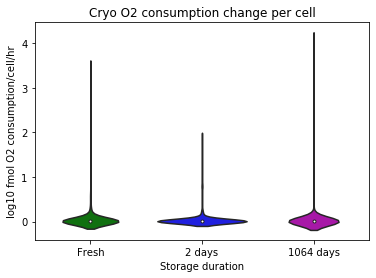

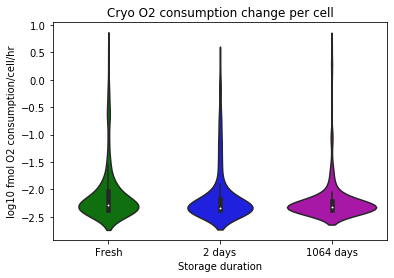

In [22]:


my_pal = {"Fresh": "g", "2 days": "b", "1064 days":"m"}


cryo_data['O2_consumption_log10']=np.log10(cryo_data['Predicted_respiration_rate_fmol_O2perhr'])

sns.violinplot(x='Storage duration', y='Predicted_respiration_rate_fmol_O2perhr', data=cryo_data, palette=my_pal)
plt.title('Cryo O2 consumption change per cell')
plt.ylabel('log10 fmol O2 consumption/cell/hr')
plt.savefig(os.path.join(images,"Cryo_violinplot.pdf"))
plt.show()


sns.violinplot(x='Storage duration', y='O2_consumption_log10', data=cryo_data, palette=my_pal)
plt.title('Cryo O2 consumption change per cell')
plt.ylabel('log10 fmol O2 consumption/cell/hr')
plt.savefig(os.path.join(images,"log10_Cryo_violinplot.pdf"))

In [18]:
from itertools import combinations
from scipy import stats

final_df=pd.DataFrame(columns=['Plate1', 'Plate2', 'tstat', 'pvalue'])

tdf1=cryo_data.loc[cryo_data['Plate']=='AH-545', 'Predicted_respiration_rate_fmol_O2perhr']

tdf2=cryo_data.loc[cryo_data['Plate']=='AH-580', 'Predicted_respiration_rate_fmol_O2perhr']
tdf3=cryo_data.loc[cryo_data['Plate']=='AM-379', 'Predicted_respiration_rate_fmol_O2perhr']
   
results=stats.ttest_ind(tdf1, tdf2)
print(results)
df2=pd.DataFrame({'duration':'2 days', 'Plate1': 'Fresh', 'Plate2': '2 days', 'tstat':results.statistic, 'pvalue': results.pvalue, 'depth':500}, index=[0])
results=stats.ttest_ind(tdf1, tdf3)
print(results)
df3=pd.DataFrame({'duration':'1064 days', 'Plate1': 'Fresh', 'Plate2': '1064 days', 'tstat':results.statistic, 'pvalue': results.pvalue, 'depth':500}, index=[0])

final_df = pd.concat([final_df, df2, df3], ignore_index = True)
final_df

Ttest_indResult(statistic=0.6531567691783715, pvalue=0.5139530549706659)
Ttest_indResult(statistic=2.8637733202554347, pvalue=0.004349026743606902)


/mnt/scgc_nfs/opt/common/anaconda3a/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Plate1,Plate2,depth,duration,pvalue,tstat
0,Fresh,2 days,500.0,2 days,0.513953,0.653157
1,Fresh,1064 days,500.0,1064 days,0.004349,2.863773


In [ ]:
from itertools import combinations
from scipy import stats

cols=['Predicted_respiration_rate_fmol_O2perhr', 'Cluster_GTDB_classification', 'Plate']
stats_df=meso[cols].copy()

genera=stats_df['Cluster_GTDB_classification'].unique().tolist()
final_df=pd.DataFrame(columns=['genus','Plate', 'Plate2', 'tstat', 'pvalue', 'depth'])

genera
for i in genera:
    tdf=stats_df[stats_df['Cluster_GTDB_classification']==i]
    
    # It would be nuce to be able to add a threshold of 3,5,10 here so that I could contol how many cells go into the statistical test
    
    
    
    tdf1=tdf.loc[tdf['Plate']=='AH-545', 'Predicted_respiration_rate_fmol_O2perhr']

    tdf2=tdf.loc[tdf['Plate']=='AH-580', 'Predicted_respiration_rate_fmol_O2perhr']
    tdf3=tdf.loc[tdf['Plate']=='AM-379', 'Predicted_respiration_rate_fmol_O2perhr']
   

    threshold=5
    # calculate do mann whitney tests on each dataset
    if len(tdf1) >= threshold:
        print(i, len(tdf1))
        if len(tdf2 >= threshold):
            results=stats.ttest_ind(tdf1, tdf2)
            df2=pd.DataFrame({'genus':i, 'amendment1': 'No_substrate', 'amendment2': 'Nitrite', 'tstat':results.statistic, 'pvalue': results.pvalue, 'depth':500}, index=[0])
        if len(tdf3 >= threshold):
            results=stats.ttest_ind(tdf1, tdf3)
            df3=pd.DataFrame({'genus':i, 'amendment1': 'No_substrate', 'amendment2': 'Ammonium', 'tstat':results.statistic, 'pvalue': results.pvalue, 'depth':500}, index=[0])
       
    # combine all the df's together
    final_df = pd.concat([final_df, df2, df3, df4, df5], ignore_index = True)

final_df.sort_values(by='pvalue', inplace=True)
final_df
